<a href="https://www.kaggle.com/code/aayushsin7a/bank-churn-binary-classification?scriptVersionId=160890593" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import the required library

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
# Set the maximum column width for display
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

print("All the libraries loaded successfully")



/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
All the libraries loaded successfully


2. # Read the dataset

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")


In [3]:
# Display these dataset for a quick overview 
train.head(5)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (165034, 14)
Test set shape:  (110023, 13)


Note that the test set has one column less than training set, the Exited column. This is because Exited is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict if an customer Exits or stays in the test set.

In [6]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

3. # Data Dictionary

In [7]:
import pandas as pd

# Define the data dictionary
data_dict = {
    'Column Name': ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
                    'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                    'IsActiveMember', 'EstimatedSalary', 'Exited'],
    'Description': ['Unique identifier for each record.',
                    'Unique identifier for each customer.',
                    'Last name of the customer.',
                    'The credit score of the customer, a numerical measure of creditworthiness.',
                    'The geographical location or country of the customer.',
                    'The gender of the customer.',
                    'The age of the customer.',
                    'The number of years the customer has been with the bank or a similar institution.',
                    'The account balance of the customer.',
                    'The number of financial products the customer has with the bank.',
                    'Whether the customer has a credit card (binary: 1 for yes, 0 for no).',
                    'Whether the customer is an active member (binary: 1 for yes, 0 for no).',
                    'The estimated salary of the customer.',
                    'Whether the customer has exited or closed their account with the bank (binary: 1 for yes, 0 for no).']
}

# Create a DataFrame from the data dictionary
df_data_dict = pd.DataFrame(data_dict)

# Display the DataFrame in a tabular format
df_data_dict.head(14)


Column Name  \
0                id   
1        CustomerId   
2           Surname   
3       CreditScore   
4         Geography   
5            Gender   
6               Age   
7            Tenure   
8           Balance   
9     NumOfProducts   
10        HasCrCard   
11   IsActiveMember   
12  EstimatedSalary   
13           Exited   

                                                                                             Description  
0                                                                     Unique identifier for each record.  
1                                                                   Unique identifier for each customer.  
2                                                                             Last name of the customer.  
3                             The credit score of the customer, a numerical measure of creditworthiness.  
4                                                  The geographical location or country of the customer.  
5                                                                            The gender of the customer.  
6                                                                               The age of the customer.  
7                      The number of years the customer has been with the bank or a similar institution.  
8                                                                   The account balance of the customer.  
9                                       The number of financial products the customer has with the bank.  
10                                 Whether the customer has a credit card (binary: 1 for yes, 0 for no).  
11                               Whether the customer is an active member (binary: 1 for yes, 0 for no).  
12                                                                 The estimated salary of the customer.  
13  Whether the customer has exited or closed their account with the bank (binary: 1 for yes, 0 for no).

In [8]:
# What about submission? 
ss = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
print(ss.head())

       id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5


In [9]:
ss.shape

(110023, 2)

So, our final dataframe that is to be submitted should look something like this, 110023 rows and 2 columns, one for id and one for Exited.

4. # EDA 

> Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [10]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
----------------------------------------
<class 'pandas.core.frame.DataFra

In [11]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. # Summary statistics for training set  

In [12]:


train.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Value counts of Geography : 
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64



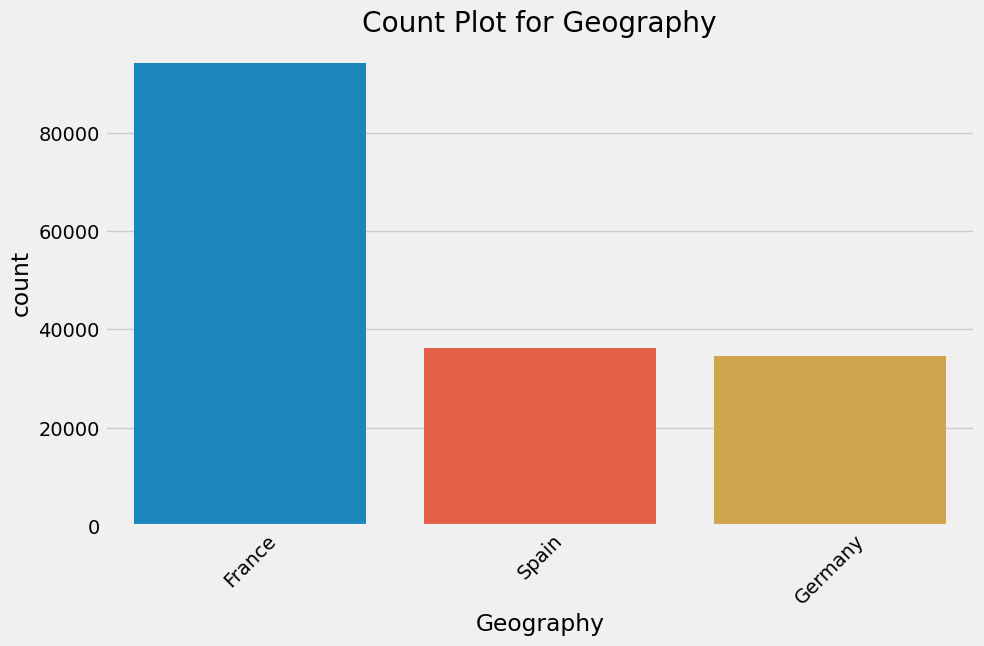

Value counts of Gender : 
Gender
Male      93150
Female    71884
Name: count, dtype: int64



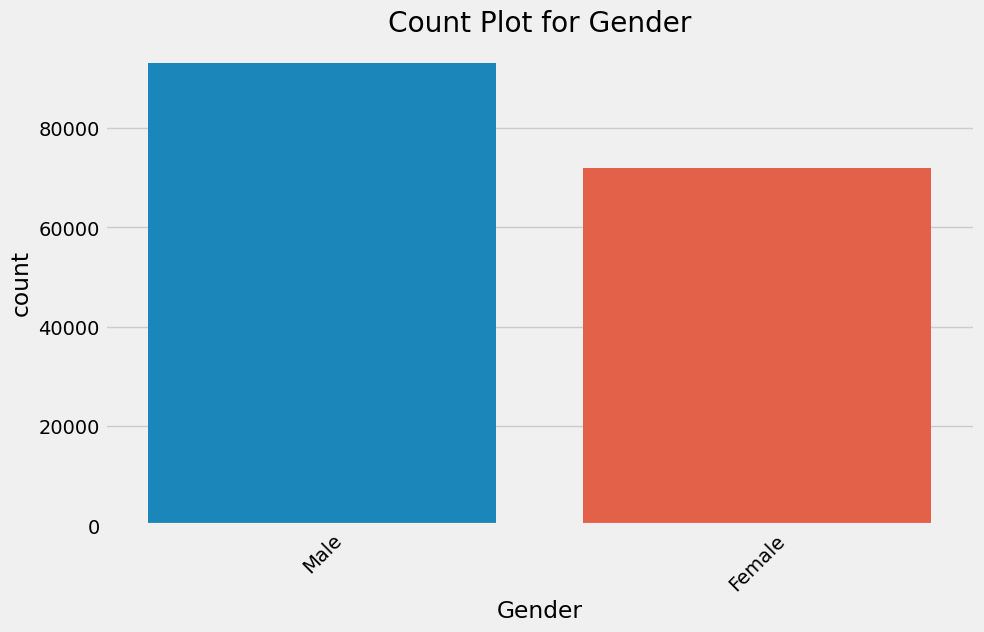

In [13]:
# Extract categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns
print(categorical_columns)

categorical_columns = categorical_columns[~categorical_columns.isin(['Surname'])]

# Loop through categorical columns 
for column in categorical_columns:
  print(f"Value counts of {column} : \n{train[column].value_counts()}\n")
  # Plot count plot
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=train, order=train[column].value_counts().index)
  plt.title(f'Count Plot for {column}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

In [14]:
# Mean of survival by sex

train[['Gender', 'Exited']].groupby('Gender', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

Gender    Exited
0  Female  0.279687
1    Male  0.159055

Text(0.5, 1.0, 'Exit Probability by Gender')

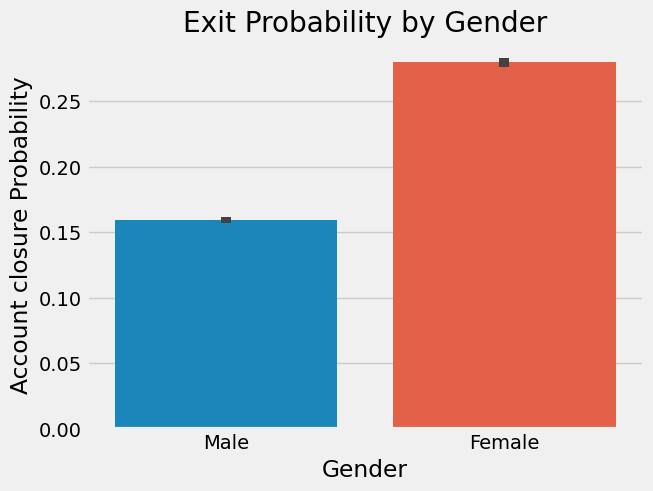

In [15]:
sns.barplot(x = 'Gender', y ='Exited', data = train)
plt.ylabel('Account closure Probability')
plt.title('Exit Probability by Gender')

# Comment: Female customers are more likely to exit

In [16]:
# Mean of survival by sex

train[['Geography', 'Exited']].groupby('Geography', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

Geography    Exited
1   Germany  0.378952
2     Spain  0.172176
0    France  0.165282

Text(0.5, 1.0, 'Exit Probability by Geography')

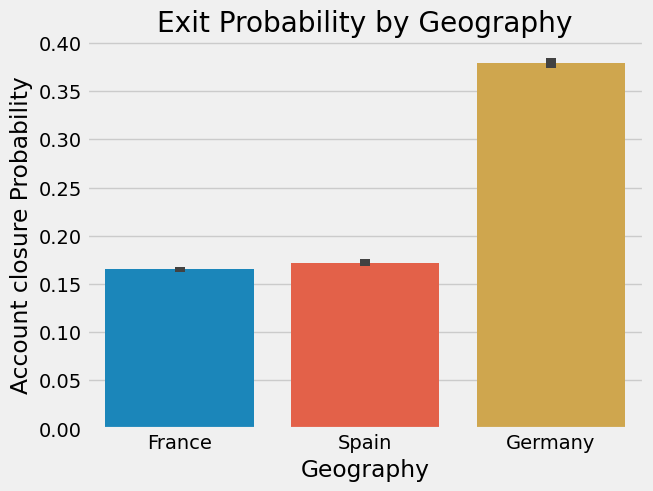

In [17]:
sns.barplot(x = 'Geography', y ='Exited', data = train)
plt.ylabel('Account closure Probability')
plt.title('Exit Probability by Geography')

# Comment: German customers are more likely to exit

In [18]:
# Extract numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical columns
print(numerical_columns)


Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


# Numerical columns 
> Numerical variables in our dataset are id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'

## Detect and remove outliers in numerical variables
> Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [19]:
from collections import Counter
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 828 indices:  [15252, 34265, 36464, 43063, 48668, 52511, 81922, 89951, 91732, 98813, 99188, 121454, 128612, 138424, 143268, 147434, 152248, 159530, 19, 110, 601, 772, 932, 1178, 1315, 1637, 1945, 2795, 3299, 3741, 4070, 4264, 4439, 4517, 4521, 4523, 4537, 5183, 5514, 5559, 6139, 7069, 7205, 7248, 7450, 7458, 7965, 7972, 8023, 8113, 8894, 8973, 9377, 9456, 10280, 11059, 11293, 11613, 12239, 12269, 12523, 12530, 12537, 12621, 12729, 14324, 14672, 14801, 14812, 14836, 15719, 15995, 16682, 16816, 17021, 17439, 17459, 17554, 17820, 17900, 17990, 18007, 18111, 18276, 18442, 18540, 18914, 19025, 19154, 19346, 19896, 20263, 20390, 20572, 20612, 20748, 20773, 21067, 22195, 22241, 22475, 23160, 23219, 23620, 24489, 24731, 24733, 25052, 25179, 25248, 26083, 26280, 26419, 26732, 26814, 27031, 27350, 27736, 27993, 28024, 28323, 28355, 29151, 29795, 30240, 30295, 30407, 30520, 30860, 31018, 31083, 31099, 31139, 31290, 31588, 31615, 31777, 31873, 32147, 32382, 32598, 32766, 32810, 

In [20]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

id  CustomerId              Surname  CreditScore Geography  \
15252    15252    15740104                Munro          425     Spain   
34265    34265    15656148               Obinna          376   Germany   
36464    36464    15787710             Tikhonov          427     Spain   
43063    43063    15630592               Ch'ien          414    France   
48668    48668    15647295                 Chin          426    France   
52511    52511    15656148               Obinna          376   Germany   
81922    81922    15794171             Lombardo          418    France   
89951    89951    15633043                T'ang          423   Germany   
91732    91732    15765173                  Lin          350    France   
98813    98813    15656351              Laidley          414    France   
99188    99188    15660316           Stephenson          420   Germany   
121454  121454    15570194            Ikemefuna          412    France   
128612  128612    15570194            Ikemefuna          412    France   
138424  138424    15611029             Ozoemena          365    France   
143268  143268    15794413               Harris          416    France   
147434  147434    15653251               Hickey          408    France   
152248  152248    15776545           Napolitani          427    France   
159530  159530    15783865                 Daly          408    France   
19          19    15650670                Ts'ui          559    France   
110        110    15782418           Chiagoziem          681   Germany   
601        601    15710164                P'eng          523    France   
772        772    15768367           Kuykendall          477    France   
932        932    15789339                  Yen          681    France   
1178      1178    15745794          Chukwualuka          706    France   
1315      1315    15631460                Munro          459     Spain   
1637      1637    15683825             Lucciano          642   Germany   
1945      1945    15682655             Li Fonti          728    France   
2795      2795    15677522                 P'an          581     Spain   
3299      3299    15607112            Chiawuotu          606   Germany   
3741      3741    15787026            Maccallum          646    France   
4070      4070    15656901                   Ma          583   Germany   
4264      4264    15793690                Hsueh          564    France   
4439      4439    15671630            Ibezimako          634    France   
4517      4517    15570629            Alexeyeva          670   Germany   
4521      4521    15591386               Ch'eng          659    France   
4523      4523    15768574            Ponomarev          712     Spain   
4537      4537    15587443            Akudinobi          728    France   
5183      5183    15761132               Martin          648    France   
5514      5514    15781034                Mason          796     Spain   
5559      5559    15752915                Hsueh          681   Germany   
6139      6139    15590201           Fiorentini          515     Spain   
7069      7069    15662494             Genovese          563    France   
7205      7205    15740442             Mazzanti          554     Spain   
7248      7248    15574331             Alexeeva          591   Germany   
7450      7450    15790717                Ch'en          674   Germany   
7458      7458    15779515            Chiemenam          627   Germany   
7965      7965    15785831               Ch'eng          646   Germany   
7972      7972    15799156           Okwuadigbo          850    France   
8023      8023    15758028           Olisaemeka          624    France   
8113      8113    15646609               Chuang          613    France   
8894      8894    15627854              Okwuoma          710     Spain   
8973      8973    15703778               Angelo          850     Spain   
9377      9377    15765173                  Lin          792    France   
9456      9456  

In [21]:
train.reset_index(drop=True, inplace=True)

In [22]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 165034 rows
After: 164206 rows


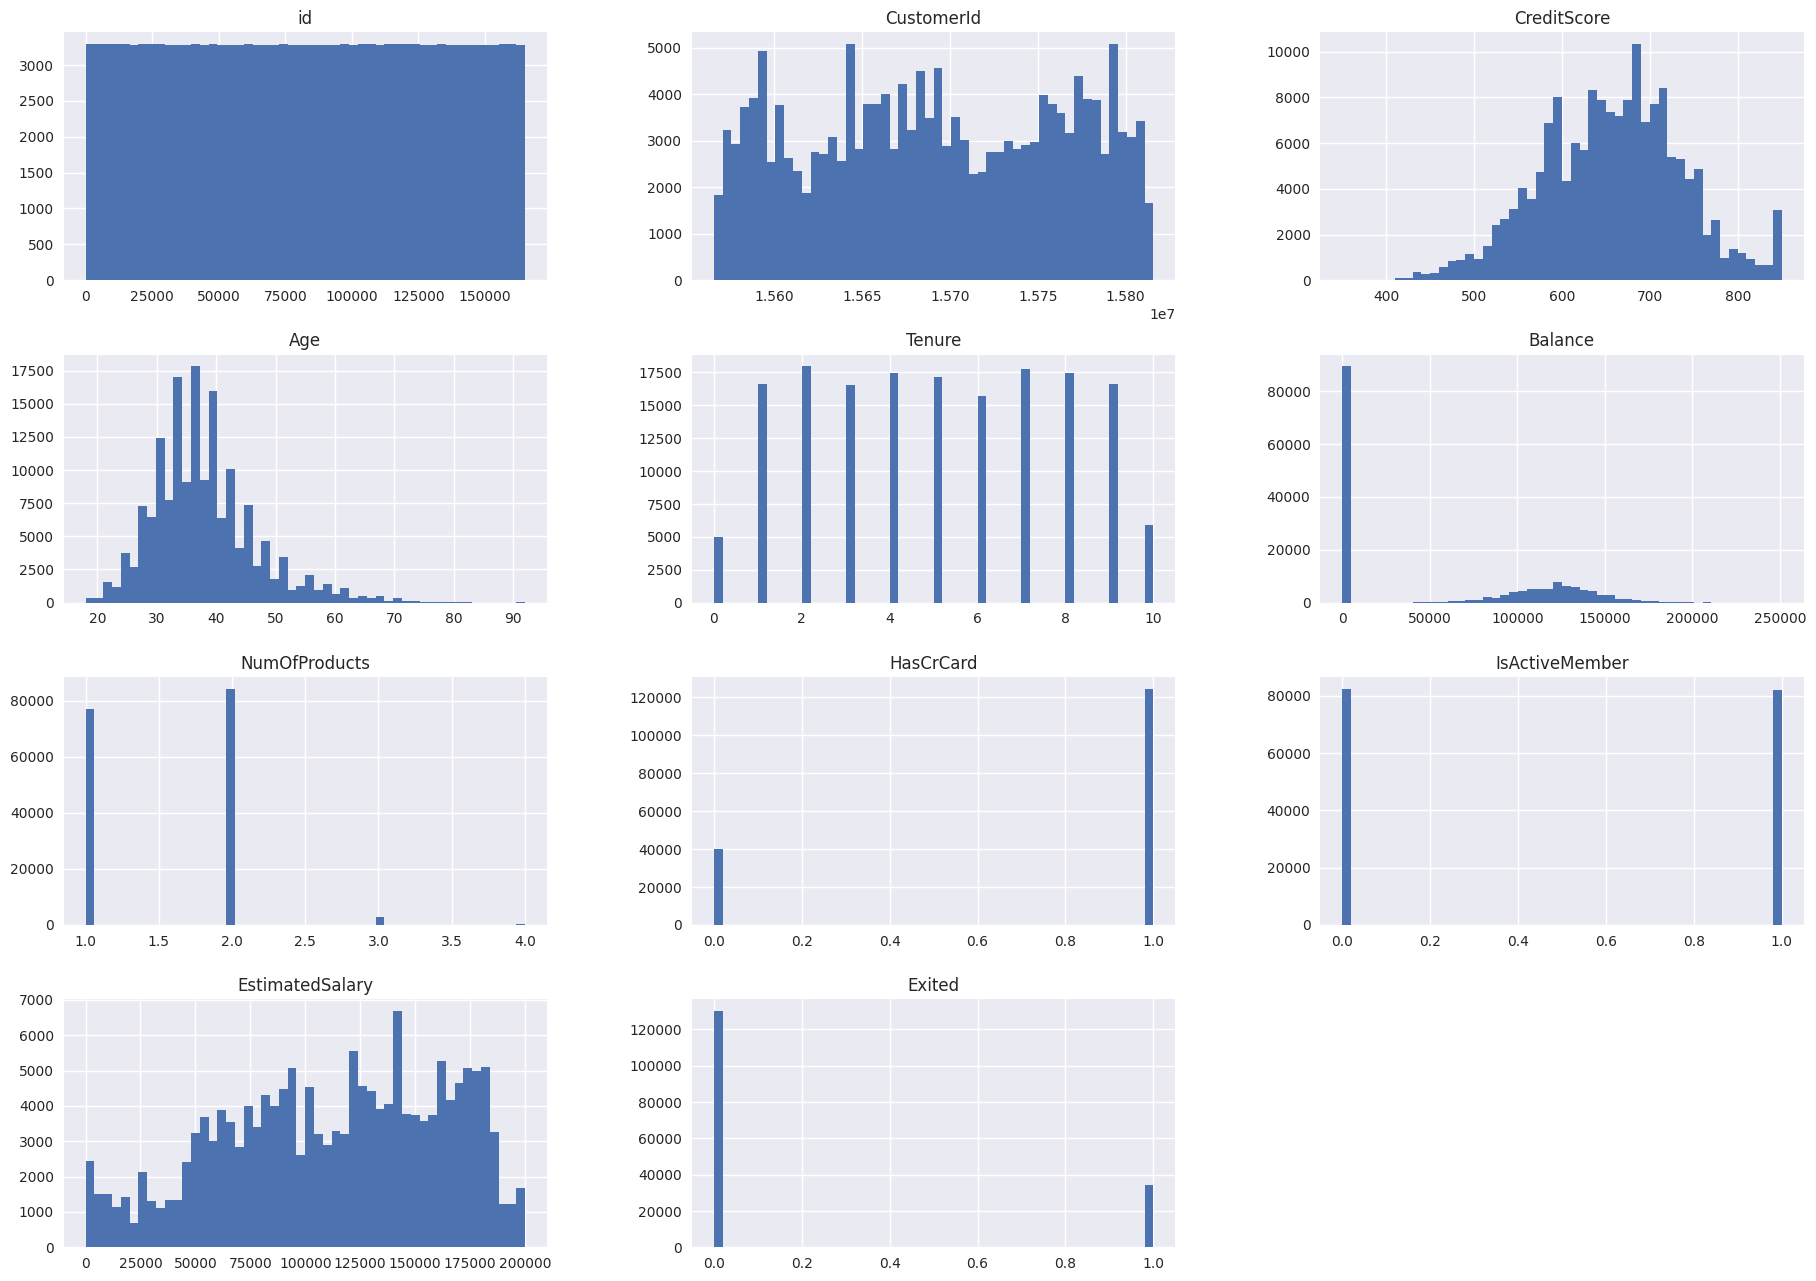

In [23]:
## Plot density plot for all features
plt.style.use('seaborn')
train.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
def diagnose_dataframe(df, verbose=True):
  """
  Performs various initial inspections on a pandas dataframe and provides details.

  Args:
    df: The pandas dataframe to diagnose.
    verbose: Whether to print details for each inspection.

  Returns:
    A dictionary containing the results of the inspections.
  """

  results = {}

  # Basic information
  results["shape"] = df.shape
  results["columns"] = list(df.columns)
  results["dtypes"] = df.dtypes.to_dict()
  results["null_counts"] = df.isnull().sum().to_dict()

  # Descriptive statistics
  results["describe"] = df.describe(include='all')

  # Unique values and counts
  for col in df.columns:
    results[f"unique_values_{col}"] = df[col].unique()
    results[f"value_counts_{col}"] = df[col].value_counts().to_dict()

  # Missing value analysis
  missing_values_pct = (df.isnull().sum() / df.shape[0]) * 100
  results["missing_values_pct"] = missing_values_pct.to_dict()
  missing_values_threshold = 0.5  # Set a threshold for high missing value percentage
  high_missing_values = missing_values_pct[missing_values_pct > missing_values_threshold]
  results["high_missing_values"] = list(high_missing_values.index)

  # Duplicate rows
  duplicate_rows = df[df.duplicated()]
  results["duplicate_rows_count"] = len(duplicate_rows)

  if verbose:
    for key, value in results.items():
      print(f"\n{key}:\n{value}")

  return results

In [25]:
diagnose_dataframe(train)


shape:
(164206, 14)

columns:
['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

dtypes:
{'id': dtype('int64'), 'CustomerId': dtype('int64'), 'Surname': dtype('O'), 'CreditScore': dtype('int64'), 'Geography': dtype('O'), 'Gender': dtype('O'), 'Age': dtype('float64'), 'Tenure': dtype('int64'), 'Balance': dtype('float64'), 'NumOfProducts': dtype('int64'), 'HasCrCard': dtype('float64'), 'IsActiveMember': dtype('float64'), 'EstimatedSalary': dtype('float64'), 'Exited': dtype('int64')}

null_counts:
{'id': 0, 'CustomerId': 0, 'Surname': 0, 'CreditScore': 0, 'Geography': 0, 'Gender': 0, 'Age': 0, 'Tenure': 0, 'Balance': 0, 'NumOfProducts': 0, 'HasCrCard': 0, 'IsActiveMember': 0, 'EstimatedSalary': 0, 'Exited': 0}

describe:
                   id    CustomerId Surname    CreditScore Geography  Gender  \
count   164206.000000  1.642060e+05  164206  164206.000000    1642

{'shape': (164206, 14),
 'columns': ['id',
  'CustomerId',
  'Surname',
  'CreditScore',
  'Geography',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Exited'],
 'dtypes': {'id': dtype('int64'),
  'CustomerId': dtype('int64'),
  'Surname': dtype('O'),
  'CreditScore': dtype('int64'),
  'Geography': dtype('O'),
  'Gender': dtype('O'),
  'Age': dtype('float64'),
  'Tenure': dtype('int64'),
  'Balance': dtype('float64'),
  'NumOfProducts': dtype('int64'),
  'HasCrCard': dtype('float64'),
  'IsActiveMember': dtype('float64'),
  'EstimatedSalary': dtype('float64'),
  'Exited': dtype('int64')},
 'null_counts': {'id': 0,
  'CustomerId': 0,
  'Surname': 0,
  'CreditScore': 0,
  'Geography': 0,
  'Gender': 0,
  'Age': 0,
  'Tenure': 0,
  'Balance': 0,
  'NumOfProducts': 0,
  'HasCrCard': 0,
  'IsActiveMember': 0,
  'EstimatedSalary': 0,
  'Exited': 0},
 'describe':                    id    CustomerId Surname    CreditS

6. # Data Preprocessing 

> Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

Maximum correlation: 1.0


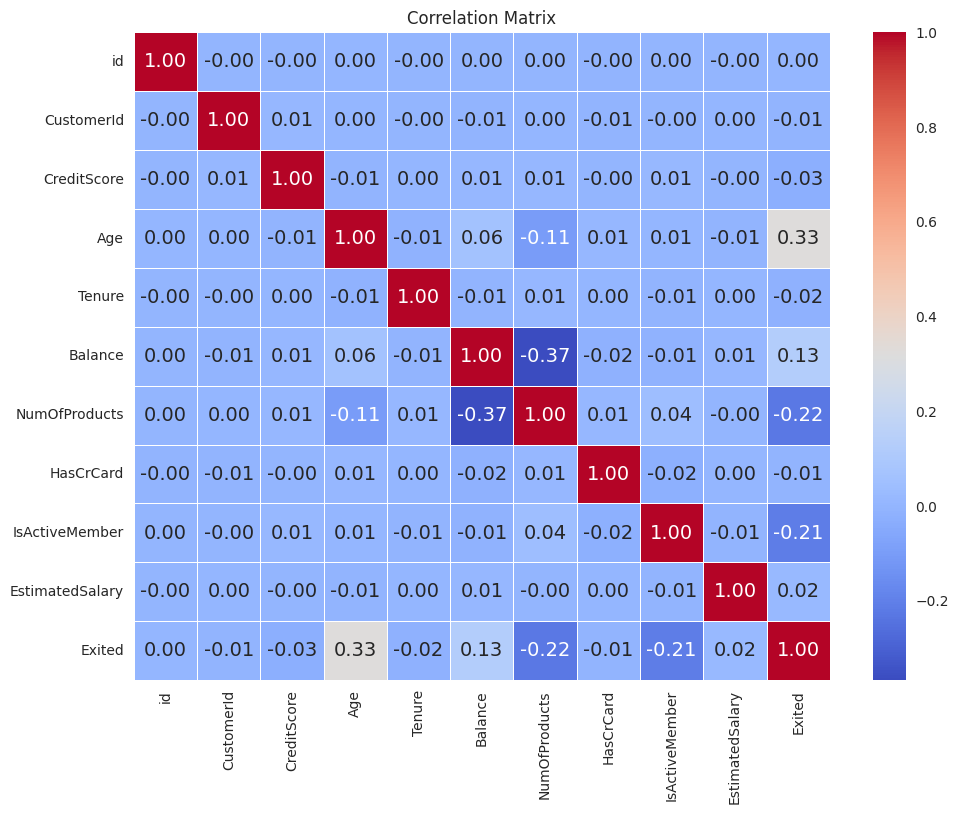

In [26]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns before calculating correlation
corr_matrix = train[numeric_columns].corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

print("Maximum correlation:", max_corr)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


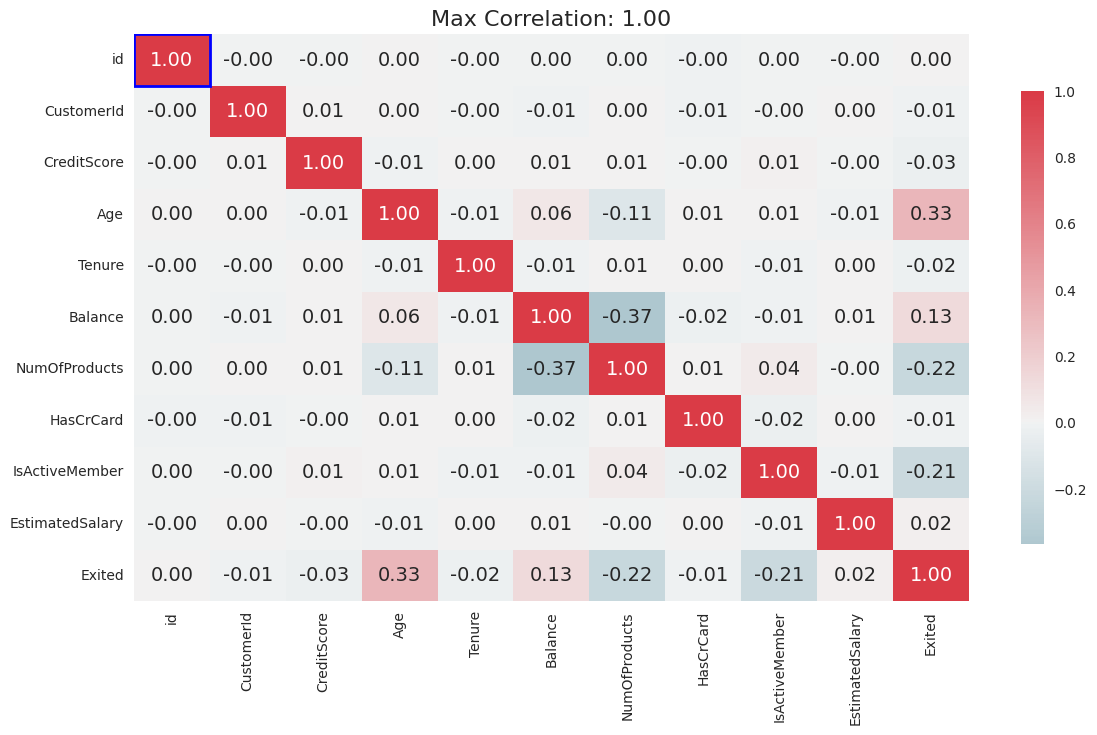

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Find the maximum correlation value and its indices
max_corr = corr_matrix.stack().max()
max_corr_indices = corr_matrix.stack().idxmax()

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Converting column names (strings) to numerical indices for the matplotlib coordinates

# Adjusting indices for matplotlib which uses zero-based indexing
# Converting column names to numerical indices
adjusted_indices = (corr_matrix.columns.get_loc(max_corr_indices[1]), corr_matrix.index.get_loc(max_corr_indices[0]))
plt.figure(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, cbar_kws={"shrink": 0.8})
plt.title(f'Max Correlation: {max_corr:.2f}', fontsize=16)

# Highlight the cell with the highest correlation value
highlighted_cell = plt.Rectangle(adjusted_indices, 1, 1, fill=False, edgecolor='blue', lw=2)
ax.add_patch(highlighted_cell)

plt.show()


In [28]:
!pip install klib 

  Obtaining dependency information for klib from https://files.pythonhosted.org/packages/96/d5/4978eb763ed5dea42633df2ff2db9893bd70091ca5469383b3da7b8352f7/klib-1.1.2-py3-none-any.whl.metadata


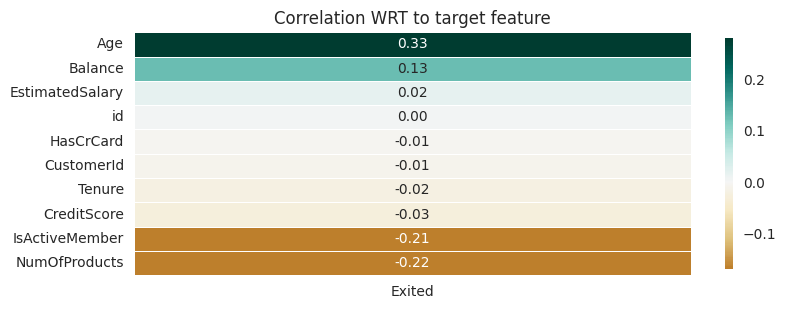

In [29]:
import klib as kl 
kl.corr_plot(train,target='Exited',figsize=(8,3))
plt.title("Correlation WRT to target feature")
plt.show()

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


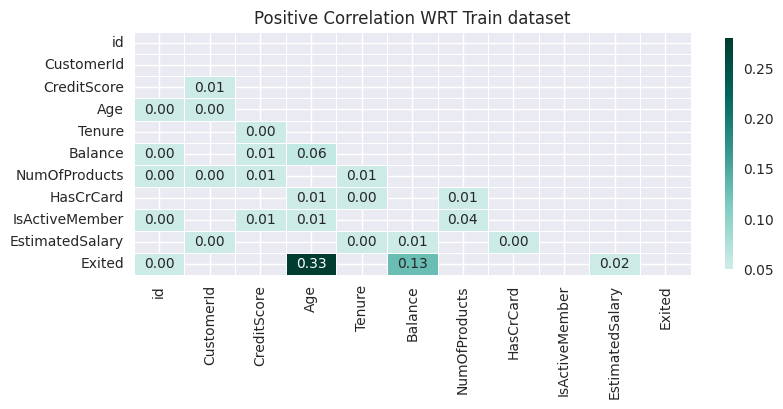

In [30]:
kl.corr_plot(train,split='pos', figsize=(8,3))
plt.title("Positive Correlation WRT Train dataset")
plt.show()


> A correlation coefficient of 0.33 between the 'Age' feature and the target feature 'Exited' (assuming positive values represent a positive correlation) indicates a moderate positive relationship between these two variables.

- Here's an interpretation of a positive correlation:

> Age and Likelihood of Exiting:

A positive correlation of 0.33 suggests that, on average, as the 'Age' of a customer increases, the likelihood of them exiting the service also tends to increase, and vice versa.
This could mean that older customers may have different preferences, needs, or reasons for exiting compared to younger customers.

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


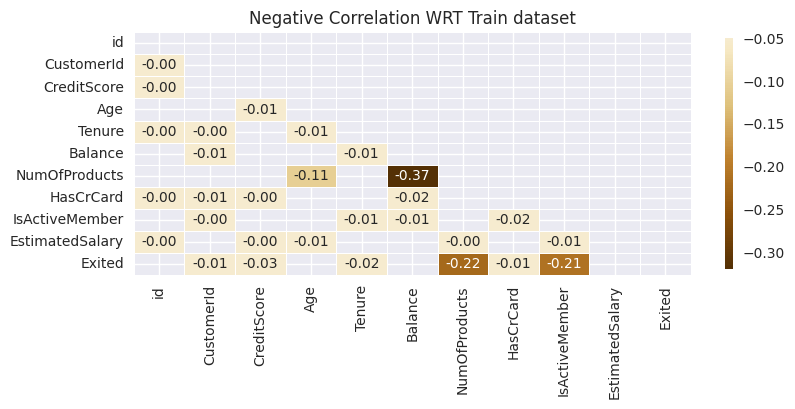

In [31]:
kl.corr_plot(train,split='neg', figsize=(8,3))
plt.title("Negative Correlation WRT Train dataset")
plt.show()


> A correlation coefficient of -0.37 between the 'Balance' feature and the target feature 'Exited' indicates a moderate negative relationship between these two variables.

- Here's an interpretation of a negative correlation:

- Balance and Likelihood of Exiting:

A negative correlation of -0.37 suggests that, on average, as the 'Balance' of a customer increases, the likelihood of them exiting the service tends to decrease, and vice versa.
Customers with lower balances are more likely to exit, while those with higher balances are less likely to exit.

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


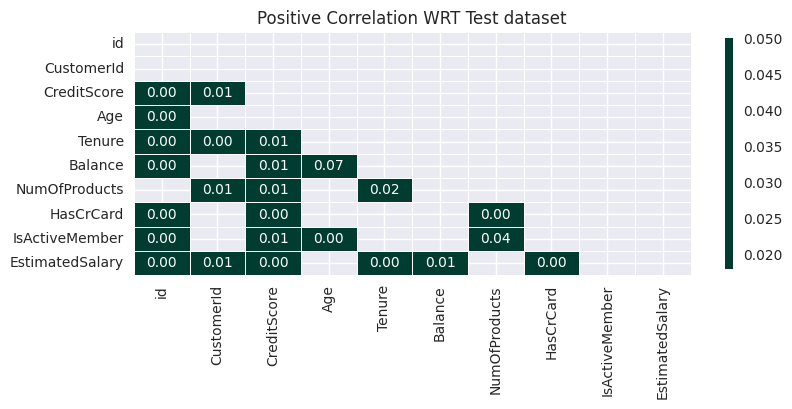

In [32]:
kl.corr_plot(test,split='pos', figsize=(8,3))
plt.title("Positive Correlation WRT Test dataset")
plt.show()

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


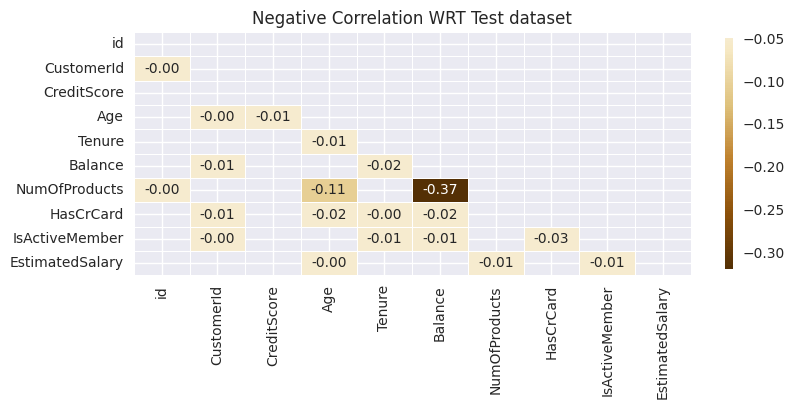

In [33]:
kl.corr_plot(test,split='neg', figsize=(8,3))
plt.title("Negative Correlation WRT Test dataset")
plt.show()

In [34]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [35]:
# Remove whitespaces from all rows
train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the cleaned DataFrame
print(train.head(5))

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [36]:
train.Gender.value_counts()

Gender
Male      92793
Female    71413
Name: count, dtype: int64

In [37]:
train['Gender'] = np.where(train['Gender'].str.contains("Male"),0,1)

In [38]:
train.head(5)

id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0   0    15674932  Okwudilichukwu          668    France       0  33.0   
1   1    15749177   Okwudiliolisa          627    France       0  33.0   
2   2    15694510           Hsueh          678    France       0  40.0   
3   3    15741417             Kao          581    France       0  34.0   
4   4    15766172       Chiemenam          716     Spain       0  33.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3       0.00              2        1.0             0.0   
1       1       0.00              2        1.0             1.0   
2      10       0.00              2        1.0             0.0   
3       2  148882.54              1        1.0             1.0   
4       5       0.00              2        1.0             1.0   

   EstimatedSalary  Exited  
0        181449.97       0  
1         49503.50       0  
2        184866.69       0  
3         84560.88       0  
4         15068.83       0